In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

#for offline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 

In [2]:
tesla = pd.read_csv('C:/Users/sakthi/Documents/ML/Project/stock_data.csv')
tesla.head()

,Date,Sentiment,Open,High,Low,Close,Volume,RSI_14,SMA_20,EMA_20
0,2013-01-29,0.505748,2.540000,2.562667,2.475333,2.530000,21399000,73.639417,2.326000,2.326000
1,2013-01-30,0.505748,2.523333,2.533333,2.495333,2.501333,14521500,68.913398,2.338167,2.342698
2,2013-01-31,0.505748,2.524667,2.524667,2.462000,2.500667,13521000,68.802937,2.345333,2.357743
3,2013-02-01,0.505748,2.544667,2.566667,2.508000,2.553333,16509000,72.550435,2.357100,2.376371
4,2013-02-04,0.503098,2.560000,2.561333,2.506000,2.516000,16920000,66.456306,2.368233,2.389669


In [3]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2566 entries, 0 to 2565
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2566 non-null   object 
 1   Sentiment  2566 non-null   float64
 2   Open       2566 non-null   float64
 3   High       2566 non-null   float64
 4   Low        2566 non-null   float64
 5   Close      2566 non-null   float64
 6   Volume     2566 non-null   int64  
 7   RSI_14     2566 non-null   float64
 8   SMA_20     2566 non-null   float64
 9   EMA_20     2566 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 200.6+ KB


In [5]:
tesla['Date'] = pd.to_datetime(tesla['Date'])

In [6]:
print(f'Dataframe contains stock prices between {tesla.Date.min()} {tesla.Date.max()}') 
print(f'Total days = {(tesla.Date.max()  - tesla.Date.min()).days} days')

Dataframe contains stock prices between 2013-01-29 00:00:00 2023-04-06 00:00:00
Total days = 3719 days


In [7]:
tesla.describe()

,Date,Sentiment,Open,High,Low,Close,Volume,RSI_14,SMA_20,EMA_20
count,2566,2.566000e+03,2566.000000,2566.000000,2566.000000,2566.000000,2.566000e+03,2566.000000,2566.000000,2566.000000
mean,2018-03-02 18:46:17.864380416,4.812653e-01,76.271227,77.999208,74.379733,76.228911,1.142900e+08,53.511633,75.529150,75.532268
min,2013-01-29 00:00:00,8.940697e-08,2.294000,2.330667,2.253333,2.292000,6.603000e+06,16.564126,2.326000,2.326000
25%,2015-08-14 18:00:00,3.956444e-01,14.677334,14.892334,14.443500,14.642666,6.429195e+07,43.916397,14.656833,14.723449
50%,2018-03-03 12:00:00,4.997084e-01,19.705667,20.046667,19.269333,19.654667,9.100725e+07,52.383942,19.503267,19.712895
75%,2020-09-17 18:00:00,5.450069e-01,127.190834,133.124172,123.604834,127.074165,1.356581e+08,63.019763,127.964300,130.806148
max,2023-04-06 00:00:00,1.000000e+00,411.470001,414.496674,405.666656,409.970001,9.140820e+08,94.197983,373.152498,363.355837
std,NaN,1.834081e-01,102.354803,104.724943,99.688868,102.231150,8.043563e+07,13.464896,101.664474,101.446634


<Axes: >

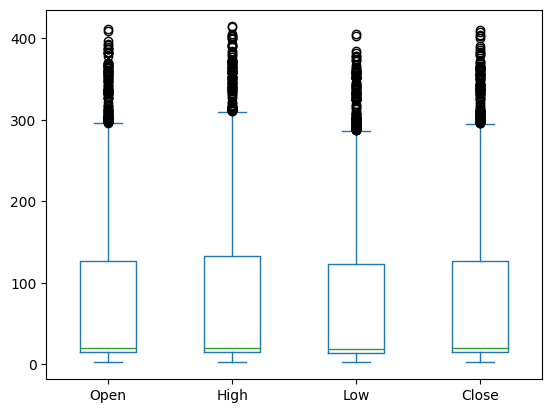

In [21]:
tesla[['Open','High','Low','Close']].plot(kind='box')

In [9]:
# Setting the layout for our plot
layout = go.Layout(
    title='Stock Prices of Tesla',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

tesla_data = [{'x':tesla['Date'], 'y':tesla['Close']}]
plot = go.Figure(data=tesla_data, layout=layout)

In [10]:
#plot(plot) #plotting offline
iplot(plot)

In [11]:
# Building the regression model
from sklearn.model_selection import train_test_split

#For preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#For model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [12]:
#Split the data into train and test sets
X = np.array(tesla.index).reshape(-1,1)
Y = tesla['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [13]:
# Feature scaling
scaler = StandardScaler().fit(X_train)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
#Creating a linear model
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [16]:
#Plot actual and predicted values for train dataset
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)
tesla_data = [trace0,trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data=tesla_data, layout=layout)

In [17]:
iplot(plot2)

In [18]:
#Calculate scores for model evaluation
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.5886217379768809	0.5708040943507533
MSE       4309.350172548578	4448.651470645749

